# Proyek Analisis Data: Bike Sharing Analysis
- Nama:Sopyan
- Email:sopyanwae60@gmail.com
- Id Dicoding:sopyan_wae

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana variasi ketersediaan sepeda berdasarkan kondisi cuaca (weathersit) pada hari-hari tertentu? Apakah cuaca yang baik memengaruhi peningkatan penyewaan?
- Pertanyaan 2 : Bagaimana tren jumlah penyewaan sepeda per bulan dari Januari 2011 hingga Desember 2012?
- pertanyaan 3 : Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda harian? Apakah terdapat tren atau pola tertentu?
- pertanyaan 4 : Apakah ada perbedaan antara distribusi penyewaan sepeda antara weekend dan weekdays?
- pertanyaan 5 : Bagaimana kontribusi pengguna casual dan registered terhadap total penyewaan sepeda?
- Pertanyaan 6 : Bagaimana performa atau tren peminjaman dalam periode satu tahun terakhir?

## Menyiapkan semua library yang dibuthkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#uploading dataset yang digunakan
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

### Assessing Data

In [4]:
#Melihat baris awal (5 baris pertama) untuk setiap dataset
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [5]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [6]:
#pengecekan missing value

print(day_df.isnull().sum())
print(hour_df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value pada data

In [7]:
day_df.duplicated().sum()
hour_df.duplicated().sum()

np.int64(0)

### Cleaning Data

In [8]:
# pengecekan outliers
Q1 = (hour_df['cnt']).quantile(0.25)
Q3 = (hour_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

print(kondisi_lower_than.sum() + kondisi_more_than.sum())


505


In [9]:
hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

In [10]:
print(day_df.describe())
print(hour_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [11]:
# Konversi kolom 'dteday' menjadi tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [12]:
# Menentukan tanggal terakhir dalam dataset
last_date = day_df['dteday'].max()

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana variasi ketersediaan sepeda berdasarkan kondisi cuaca (weathersit) pada hari-hari tertentu? Apakah cuaca yang baik memengaruhi peningkatan penyewaan?

C:\Users\Sopyan wae\AppData\Local\Temp\ipykernel_5976\1498206093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


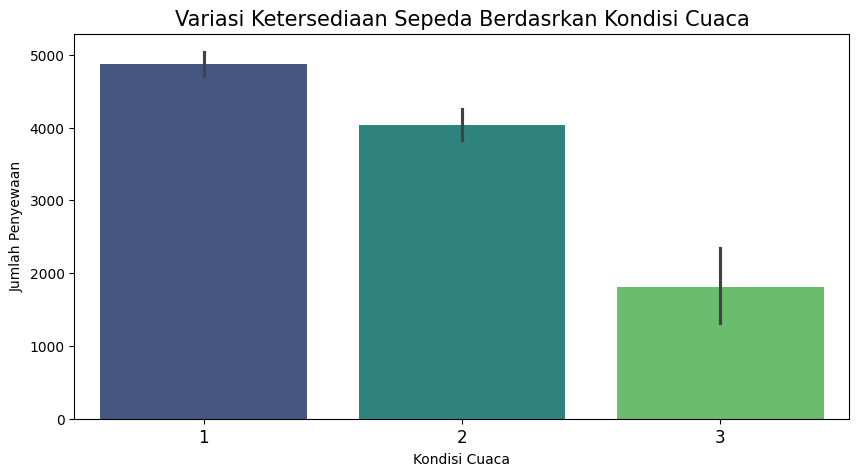

In [14]:
#Ketersediaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weathersit",
    data=day_df,
    palette="viridis"
)
plt.title("Variasi Ketersediaan Sepeda Berdasrkan Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Kondisi Cuaca")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2 : Bagaimana tren jumlah penyewaan sepeda per bulan dari Januari 2011 hingga Desember 2012?

C:\Users\Sopyan wae\AppData\Local\Temp\ipykernel_5976\911261380.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bulanan = hour_df.groupby(pd.Grouper(key='dteday', freq='M')).sum()


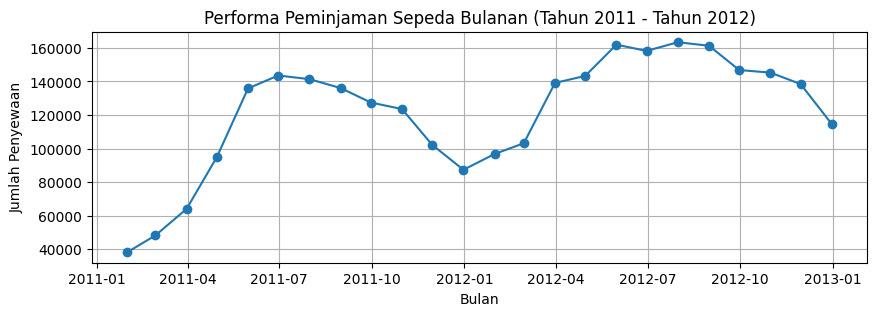

In [15]:
#Performa peminjaman sepeda bulanan (Tahun 2011 - Tahun 2012)
bulanan = hour_df.groupby(pd.Grouper(key='dteday', freq='M')).sum()
plt.figure(figsize=(10, 3))
plt.plot(bulanan.index, bulanan['cnt'], marker='o', linestyle='-')
plt.title('Performa Peminjaman Sepeda Bulanan (Tahun 2011 - Tahun 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()  # Streamlit plotting


### Pertanyaan 3:Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda harian? Apakah terdapat tren atau pola tertentu?

C:\Users\Sopyan wae\AppData\Local\Temp\ipykernel_5976\2200623829.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


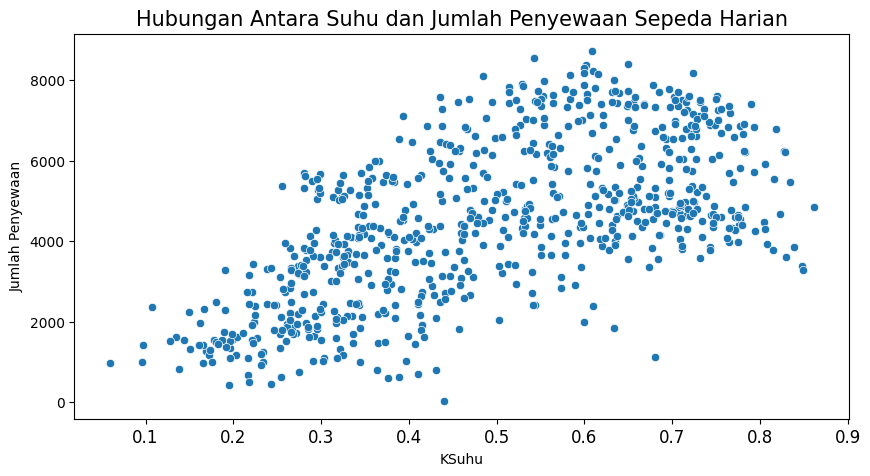

In [16]:
#Hubungan antara suhu dan jumlah penyewaan sepeda harian

plt.figure(figsize=(10, 5))

sns.scatterplot(
    y="cnt",
    x="temp",
    data=day_df,
    palette="viridis"
)
plt.title("Hubungan Antara Suhu dan Jumlah Penyewaan Sepeda Harian", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("KSuhu")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Apakah ada perbedaan antara distribusi penyewaan sepeda antara weekend dan weekdays?

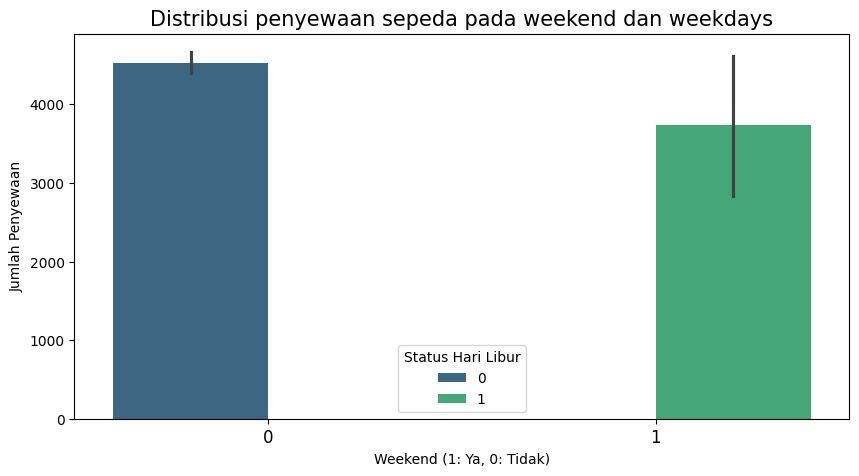

In [17]:
# Distribusi penyewaan sepeda pada weekend dan weekdays

plt.figure(figsize=(10, 5))

sns.barplot(
    x="holiday",
    y="cnt",
    data=day_df,
    palette="viridis",
    hue="holiday",  # Menambahkan hue untuk memberikan warna berdasarkan status holiday
    dodge=True      # Memastikan batang tidak saling tumpang tindih
)

plt.title("Distribusi penyewaan sepeda pada weekend dan weekdays", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Weekend (1: Ya, 0: Tidak)")
plt.tick_params(axis='x', labelsize=12)
plt.legend(title="Status Hari Libur")  # Menambahkan legenda
plt.show()

### Pertanyaan 5: Bagaimana kontribusi pengguna casual dan registered terhadap total penyewaan sepeda?

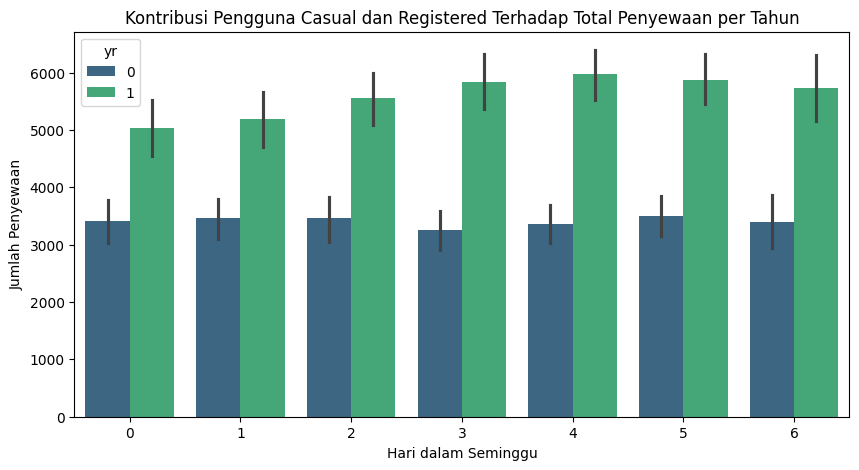

In [18]:
# Plotting kontribusi pengguna casual dan registered per tahun

plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='weekday', y='cnt', hue='yr', palette='viridis')
plt.title('Kontribusi Pengguna Casual dan Registered Terhadap Total Penyewaan per Tahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 6 : Bagaimana performa atau tren peminjaman dalam periode satu tahun terakhir?

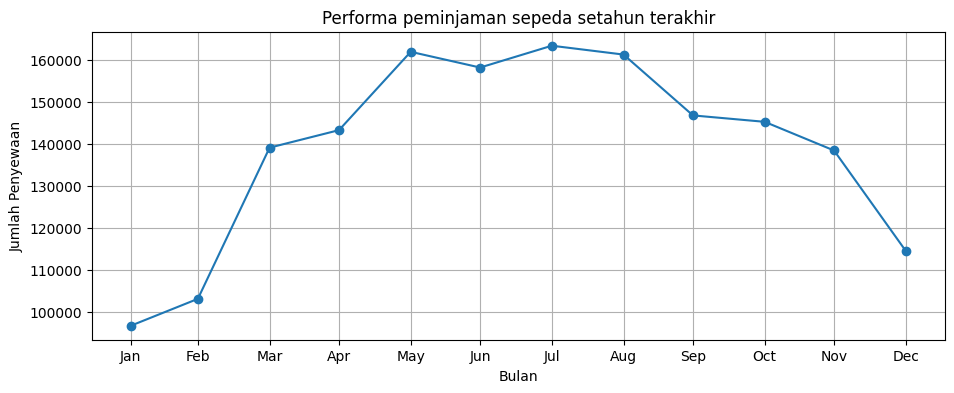

In [32]:
data = hour_df[hour_df['yr'] == 1]
bulan = data.groupby(pd.Grouper(key='dteday', freq='M')).sum()
plt.figure(figsize=(11, 4))
plt.plot(bulan.index, bulan['cnt'], marker='o', linestyle='-')
plt.xticks(bulan.index, bulan.index.strftime('%b'))
plt.title('Performa peminjaman sepeda setahun terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Conclusion

**Conclution pertanyaan 1**: Berdasarkan barplot kondisi cuaca terhadap jumlah penyewaan dapat saya simpulkan menjadi:
- weathersit 1 : pada kondisi ini cuaca baik yang berpengaruh pada tingginya penyewaan sepeda.
-weathersit 2 dan 3 : pada kondisi ini cuaca lebih buruk sehingga terjadi penurunan penyewaan sepeda

**Conclution pertanyaan 2**: Grafik tersebut menunjukkan tren peminjaman sepeda bulanan dari Januari 2011 hingga Januari 2013. Jumlah peminjaman meningkat pesat pada awal 2011, mencapai puncak tertinggi di pertengahan tahun, sekitar Juli 2011. Setelah itu, peminjaman cenderung stabil hingga akhir 2011, sebelum menurun tajam di awal 2012. Namun, pada pertengahan 2012, jumlahnya kembali naik dan mencapai puncak baru, tetapi kemudian menurun lagi menjelang akhir tahun 2012 hingga Januari 2013. Ini menunjukkan adanya pola musiman, dengan peningkatan peminjaman di pertengahan tahun dan penurunan di awal tahun.


**Conclution pertanyaan 3**: berdasarkan visualisasi berdasarkan scatterplot dapat disimpulkan bahwa semakin tinggi cuaca maka semakin tinggi pula jumlah penyewaan sepeda. Hal ini sejalan dengan conlusin pertanyaan 1.

**Conclution pertanyaan 4**: berdasrakan barplot menunujukan hasil bahwa tingkat penyewaan pada *weekdays* lebih tinggi dari pada *weekend*. Hal ini terjadi karena pada saat cuaca yang baik kecenderungan dari orang-orang untuk keluar rumah untuk menikmati keindahan alam.

**Conclution pertanyaan 5**: berdasarkan barplot dapat ditarik kesimpulan bahwa:
- pada tahun 2011 dan 2012 terlihat pengguna casual dan registered terhadap penyewaan sepeda cukup seragam.
- pengguna registered memberikan kontribusi lebih tinggi dibandingkan casual dalam penyewaan sepeda.
- karena tingginya pengguna registered dalam penyewaan sepeda, maka bisnis bisa meningkatkan jumlah pengguna registerednya untuk meningkatkan volume penyewaan ini.

**Conclution pertanyaan 6**: Grafik tersebut menunjukkan tren peminjaman sepeda selama setahun terakhir. Peminjaman sepeda meningkat secara bertahap dari Januari hingga mencapai puncaknya pada bulan Mei. Setelah itu, peminjaman tetap tinggi dan stabil hingga Agustus, sebelum mulai menurun secara bertahap dari September hingga Desember, dengan penurunan paling tajam terjadi di bulan terakhir. Ini menunjukkan bahwa peminjaman sepeda cenderung tinggi di pertengahan tahun dan menurun menjelang akhir tahun.
